# #Task 4:- To Explore Decision Tree Algorithm on Iris Dataset.

In [54]:
#importing  essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
#Loading the dataset
df=pd.read_csv("C:/Users/DELL/Downloads/datasets_19_420_Iris.csv")

**Data Preprocessing:-**

In [56]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [58]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [59]:
#Changing the target variable from Categorical to Numerical
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()     #Label Encoding
label=LE.fit_transform(df["Species"])

In [60]:
#Dropping the unuseful columns
df=df.drop("Species", axis='columns')
df=df.drop("Id", axis='columns')

In [61]:
#appending the transformed column 
df["Species"]=label
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


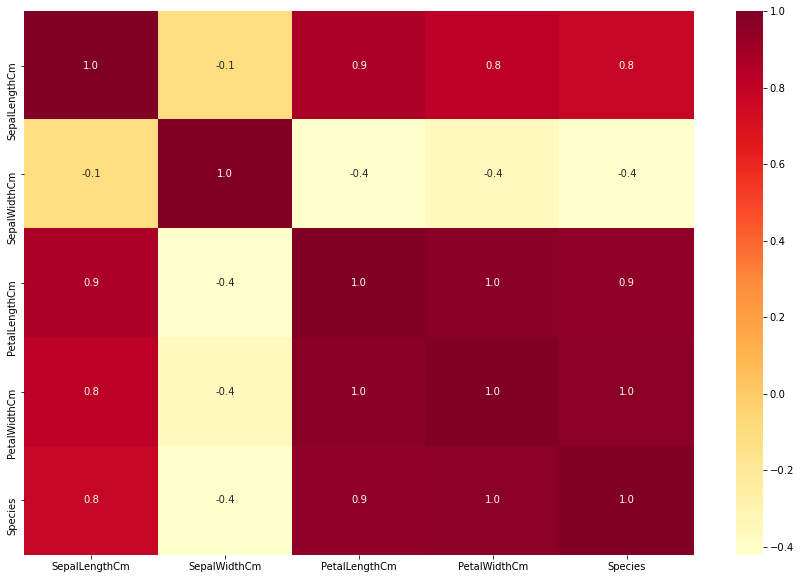

In [68]:
#Visualize the correlation between the features
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="YlOrRd")

**Look at the high correlations in most of the cases!!**

In [36]:
#Let's check the unique values of our target
df["Species"].unique()

array([0, 1, 2])

**Splitting and storing into separate variables to apply ML model!**

In [37]:
#Assigning the dependent and the independent variable
X=df.iloc[:, :-1].values
y=df.iloc[:, -1]

In [38]:
X.shape, y.shape

((150, 4), (150,))

In [39]:
#Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=0)

In [40]:
#Checking the shape of the training and the test data set
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


# Decision Tree Classifier Model:-

In [41]:
#importing the model and data-fitting
from sklearn.tree import DecisionTreeClassifier
DTT=DecisionTreeClassifier(random_state=0)
DTT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [42]:
#Let's predict with the test dataset
y_pred=DTT.predict(X_test)

In [43]:
#Let's see how is the Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



**So, the model comes up with 98% accuracy, which is really great. We can use any test data to get desirable outputs for sure.**
**More specifically, the model predicts the species 'Iris-setosa' with 100% accuracy, 'Iris-versicolor' with 97% accuracy and 'Iris-virginica' with 97% accuracy, which is actualy amazing!**

# Visualize the Decision Tree:-

In [50]:
#Setting feature names for the tree visualization
Feature_names=list(df.columns[1:])

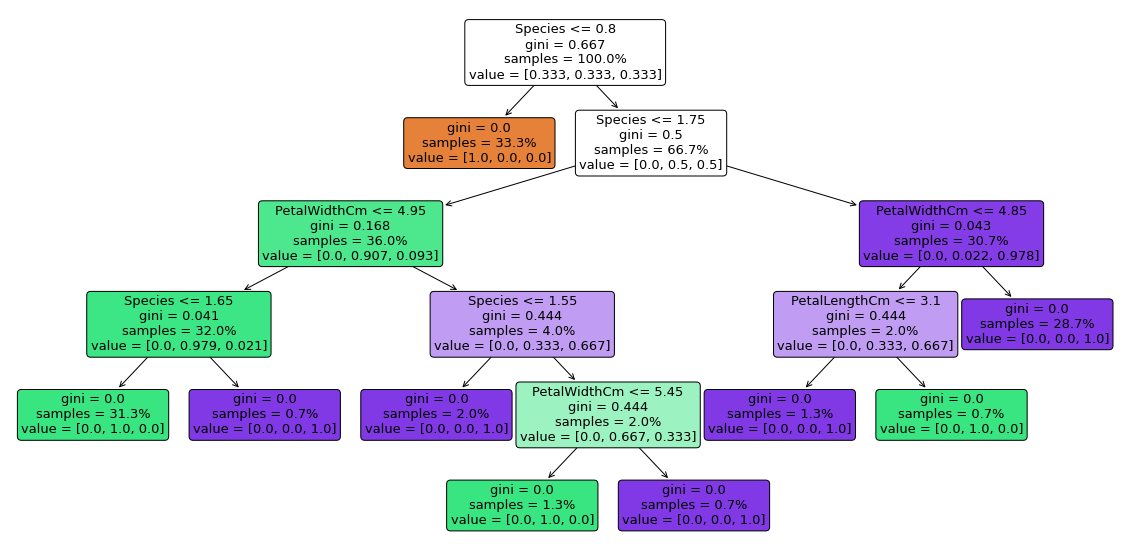

In [53]:
from sklearn import tree
Tree = plt.figure(figsize =(20,10))
Tree = tree.plot_tree(DTT, feature_names = Feature_names,fontsize = 13, filled = 'True',proportion = True, rounded = 10)
plt.show()

**Hence the desicion tree is shown and the model is built with great accuracy. The Decision Tree Classifier Model is explored successfully.**

# Thank you